<a href="https://colab.research.google.com/github/Renato-Eishima/Python_analise_financas/blob/main/%C3%8Dndice_carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Calculando o Retorno do Índice Bovespa

In [1]:
!pip install -q yfinance

     |████████████████████████████████| 6.4 MB 30.1 MB/s 
     |████████████████████████████████| 63 kB 701 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Pegando os dados da B3 (antiga Bovespa) do período de 1º janeiro de 2000 até hoje.

In [9]:
indice = ['^BVSP']
dado_indice = pd.DataFrame()

for ind in indice:
  dado_indice[ind] = yf.download(ind, start = '2017-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [10]:
dado_indice.head()

,^BVSP
Date,
2017-01-02,59589.0
2017-01-03,61814.0
2017-01-04,61589.0
2017-01-05,62071.0
2017-01-06,61665.0


In [11]:
dado_indice.tail()

,^BVSP
Date,
2022-02-07,111996.00000
2022-02-08,112234.00000
2022-02-09,112461.00000
2022-02-10,113359.00000
2022-02-11,113582.03125


Normalize os dados por 100 e plote os resultados no gráfico.

### Normalização por 100:

$$
\frac {P_t}{P_0} * 100
$$

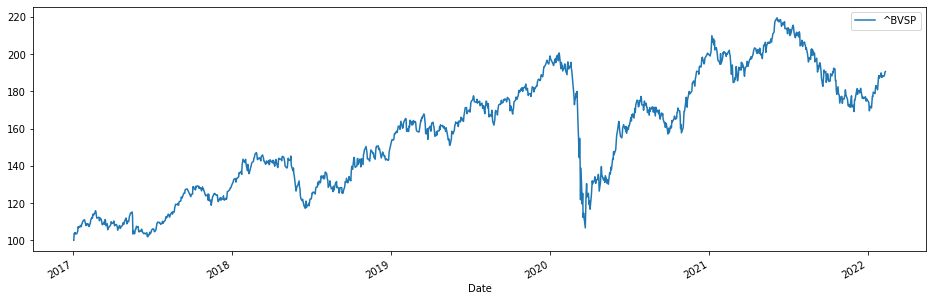

In [12]:
(dado_indice / dado_indice.iloc[0] * 100).plot(figsize = (16, 5))
plt.show()

Obtenha o retorno simples do indice Bovespa.

In [19]:
retorno_ind = (dado_indice / dado_indice.shift(1)) - 1

retorno_ind.tail()

,^BVSP
Date,
2022-02-07,-0.002973
2022-02-08,0.002125
2022-02-09,0.002023
2022-02-10,0.007985
2022-02-11,0.001967


Estime o valor médio do retorno do índice Bovespa.

In [20]:
ret_ind_anual = retorno_ind.mean() * 250 # ret_ind_anual: retorno dos índices anuais
ret_ind_anual

^BVSP    0.163396
dtype: float64

In [21]:
carteira_indice = ['EGIE3.SA', 'ITSA4.SA', 'SULA11.SA', 'ABEV3.SA', 'LREN3.SA', 'SLCE3.SA', 'BBAS3.SA', 'CSAN3.SA', 'B3SA3.SA', '^BVSP']
carteira2 = pd.DataFrame()

for ativo in carteira_indice:
  # print(ativo)
  carteira2[ativo] =  yf.download(ativo, start = '2017-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
carteira2.head()

,EGIE3.SA,ITSA4.SA,SULA11.SA,ABEV3.SA,LREN3.SA,SLCE3.SA,BBAS3.SA,CSAN3.SA,B3SA3.SA,^BVSP
Date,,,,,,,,,,
2017-01-02,19.134184,5.317467,11.952115,13.968291,17.586407,4.431844,21.435801,8.195603,4.571316,59589.0
2017-01-03,19.875387,5.550631,12.532646,14.250914,18.126011,4.462075,22.416519,8.577257,4.759449,61814.0
2017-01-04,19.622831,5.583017,12.997072,14.139579,17.966413,4.610206,22.299768,8.581669,4.849303,61589.0
2017-01-05,19.480083,5.634830,12.969752,14.216656,17.799215,4.737176,22.245287,8.566226,4.790336,62071.0
2017-01-06,19.238503,5.615401,12.867306,14.096756,17.594009,4.734152,22.486576,8.367678,4.787528,61665.0


In [23]:
carteira2.tail()

,EGIE3.SA,ITSA4.SA,SULA11.SA,ABEV3.SA,LREN3.SA,SLCE3.SA,BBAS3.SA,CSAN3.SA,B3SA3.SA,^BVSP
Date,,,,,,,,,,
2022-02-07,40.270000,10.13,23.940001,14.29,25.690001,48.500000,31.860001,22.540001,13.70,111996.00000
2022-02-08,40.080002,10.15,24.350000,14.16,25.580000,47.900002,32.200001,22.170000,13.55,112234.00000
2022-02-09,40.500000,9.98,24.940001,14.54,25.910000,48.209999,31.920000,22.360001,14.16,112461.00000
2022-02-10,40.360001,10.09,25.420000,14.75,25.580000,48.740002,32.270000,22.320000,14.10,113359.00000
2022-02-11,40.509998,10.52,25.410000,14.86,25.350000,47.730000,33.400002,22.270000,13.92,113582.03125


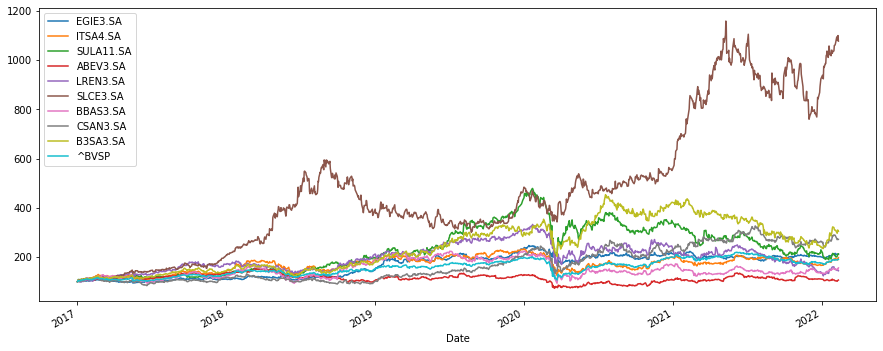

In [24]:
(carteira2 / carteira2.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()